# Práctica 1: Árboles de decisiones.
## 1.- Importamos las librerías

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
!pip install graphviz

## 2.- Importamos datos a un DataFrame

In [3]:
dataset= pd.read_csv("mushrooms.csv")

## 3.- Descripción y visualización de datos

### 3.1.- info()
Nos muestra la información de los datos cargados en DataFrame como las columnas, el tipo de dato de cada una, el número de instancias, si hay nulos y el espacio de memoria ocupado.


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

### 3.2.- head() o tail()
Nos muestra los primeros o últimos registros de nuestro DataFrame. Por defecto muestra solo 5 elementos pero se le puede indicar el número de instancias por medio del método.


In [5]:
dataset.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### 3.3.- describe()
Nos muestra las estadísticas descriptivas

In [6]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 4.- Manipulación de datos
### 4.1.- Eliminamos valores nulos

In [7]:
dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

### 4.1.- Codificación de datos
Con el objetivo de hacer más entendible el dataset haremos la condificación de los datos. Para ello, pandas no permite hacerlo haciendo uso de mapeados 
Primero generamos los diccionarios.

Después haremos el mapeado con la ayuda de cada diccionario

In [8]:
class_cod={"e":1, "p":2}#para class
capshape_cod={"b":1,
              "c":2,
              "x":3,
              "f":4,
              "k":5,
              "s":6}#para cap-shape

surface={"f":1,
                  "y":2,
                   "g":3,
                  "k":4,
                  "s":5}
color_cod={"n":1,
          "b":2,
          "c":3,
          "g":4,
          "r":5,
          "p":6,
          "u":7,
          "e":8,
          "w":9,
          "y":10,
          "o":11,
          "k":12,
          "h":13}

bruises={"t":1,
        "f":2}#Sepa que sea xD
odor={"a":1,
     "l":2,
     "c":3,
     "y":4,
     "f":5,
     "m":6,
     "n":7,
     "p":8,
     "s":9}
gillAttachment={"a":1,
               "d":2,
               "f":3,
               "n":4}
gillSpacing={"c":1,
            "w":2,
            "d":3}
gillSize={"b":1,
         "n":2}

stalkShape={"e":1,
           "t":2}

stalkRoot={"b":1,
          "c":2,
          "u":3,
          "e":4,
          "z":5,
          "r":6,
          "?":7}

veilType={"p":1,
         "u":2}

ringNumber={"n":0,
           "o":1,
           "t":2}
ringType={"c":1,
         "e":2,
         "f":3,
         "l":4,
         "n":5,
         "p":6,
         "s":7,
         "z":8}
population={"a":1,
           "c":2,
           "n":3,
           "s":4,
           "v":5,
           "y":6}
habitat={"g":1,
        "l":2,
        "m":3,
        "p":4,
        "u":5,
        "w":6,
        "d":7}
### MAPEAMOS LAS CLASES
dataset["class"]=dataset["class"].map(class_cod)
### MAPEAMOS LOS COLORES
dataset["cap-color"]=dataset["cap-color"].map(color_cod)
dataset["stalk-color-above-ring"]=dataset["stalk-color-above-ring"].map(color_cod)
dataset["stalk-color-below-ring"]=dataset["stalk-color-below-ring"].map(color_cod)
dataset["spore-print-color"]=dataset["spore-print-color"].map(color_cod)
dataset["veil-color"]=dataset["veil-color"].map(color_cod)
dataset["gill-color"]=dataset["gill-color"].map(color_cod)
### MAPEADO PARA LA SUPERFICIE 
dataset["stalk-surface-below-ring"]=dataset["stalk-surface-below-ring"].map(surface)
dataset["stalk-surface-above-ring"]=dataset["stalk-surface-above-ring"].map(surface)
dataset["cap-surface"]=dataset["cap-surface"].map(surface)
### MAPEAMOS EL RESTO XD

dataset["cap-shape"]=dataset["cap-shape"].map(capshape_cod)                   
dataset["bruises"]=dataset["bruises"].map(bruises)                    
dataset["odor"]=dataset["odor"].map(odor)                        
dataset["gill-attachment"]=dataset["gill-attachment"].map(gillAttachment)             
dataset["gill-spacing"]=dataset["gill-spacing"].map(gillSpacing)
dataset["gill-size"]=dataset["gill-size"].map(gillSize)
dataset["stalk-shape"]=dataset["stalk-shape"].map(stalkShape)
dataset["stalk-root"]=dataset["stalk-root"].map(stalkRoot)
dataset["veil-type"]=dataset["veil-type"].map(veilType)
dataset["ring-number"]=dataset["ring-number"].map(ringNumber)
dataset["ring-type"]=dataset["ring-type"].map(ringType)   
dataset["population"]=dataset["population"].map(population)
dataset["habitat"]=dataset["habitat"].map(habitat)                    
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,5,1,1,8,3,1,2,12,...,5,9,9,1,9,1,6,12,4,5
1,1,3,5,10,1,1,3,1,1,12,...,5,9,9,1,9,1,6,1,3,1
2,1,1,5,9,1,2,3,1,1,1,...,5,9,9,1,9,1,6,1,3,3
3,2,3,2,9,1,8,3,1,2,1,...,5,9,9,1,9,1,6,12,4,5
4,1,3,5,4,2,7,3,2,1,12,...,5,9,9,1,9,1,2,1,1,1


In [9]:
#print(sorted(set(dataset["odor"])))
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-root                  8124 non-null int64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-type                   8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8

## Data Minning(Árboles de decisión)

### 4.1.- Separación de datos
Para poder validar si algún algoritmo de aprendizaje tiene buenos resultados debemos partir nuestros datos en 2 subconjuntos. Al primer subconjunto se le llama "conjunto de entrenamiento" y al segundo "conjunto de prueba".

* Como su nombre lo dice, el conjunto de entrenamiento es con el que le enseñaremos al "algoritmo" a realizar las preicciones. Este conjunto es un 75% a 80% del tamaño del original
* El conjunto de prueba es con el que verificaremos qué tanto acierta en modelo después de haber sido entrenado. ESste conjunto NO debe haber sido utilizado para entrenar NUNCA. De lo contrario, la veracidad de la prueba se verá compropmetida. Este conjunto es de un 20% a 25%

Podemos hacer la separación de los datos de forma manual pero hay que considerar que los datos deben estar balanceados. Para evitar estas complicaciones, scikit learn nos proporciona un método que se encarga de particionar los datos.


In [10]:
X_values=dataset.iloc[:,1:]
Y_values=dataset["class"]
x_train, x_test,y_train,y_test= train_test_split(X_values,Y_values,test_size=0.2, random_state=0)
x_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7434,5,5,4,2,7,3,2,1,6,1,...,5,9,9,1,9,2,6,9,4,1
7725,3,1,9,2,7,3,2,1,4,1,...,5,9,9,1,9,2,6,9,3,1
783,3,5,9,1,2,3,1,1,1,1,...,5,9,9,1,9,1,6,12,4,3
1928,4,5,9,2,7,3,2,1,13,2,...,1,9,9,1,9,1,2,12,4,1
7466,5,2,8,2,4,3,1,2,2,2,...,4,9,6,1,9,1,2,9,5,2


In [11]:
y_train.head()

7434    1
7725    1
783     1
1928    1
7466    2
Name: class, dtype: int64

In [12]:
modelo = tree.DecisionTreeClassifier()
modelo = modelo.fit(x_train, y_train)

### 5.- Visualización del árbol

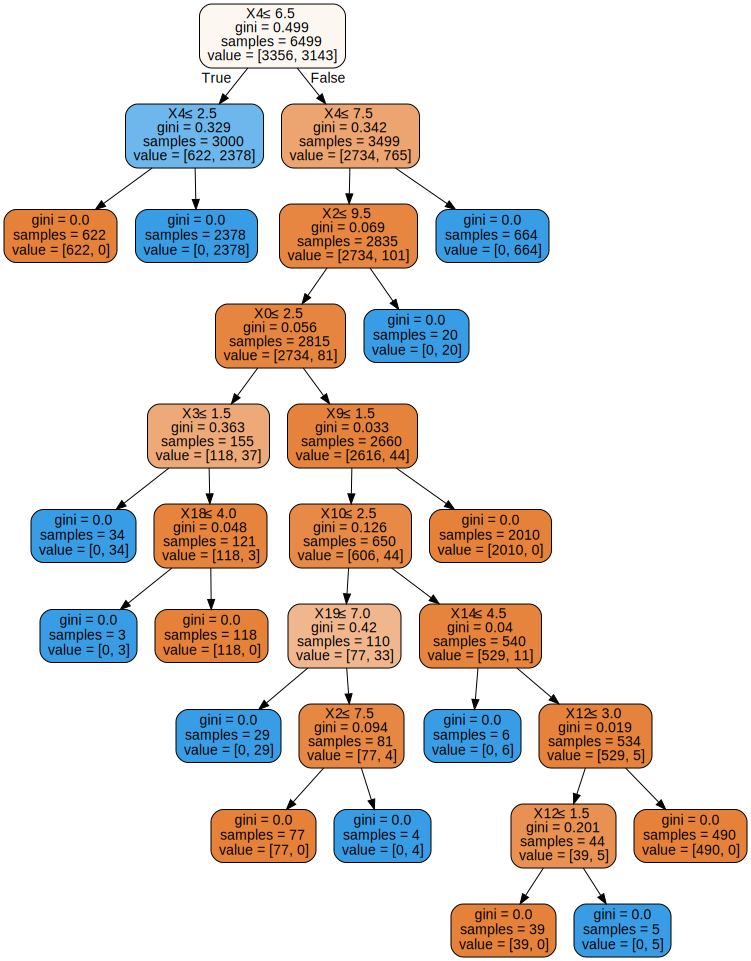

In [13]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(modelo, out_file="hongos.dot",  
                filled=True, rounded=True,
                special_characters=True
               )
with open("hongos.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)